 Projeto de Classificação - Previsão de Falência Cardíaca

 Este projeto resolve o desafio de IA com foco em **classificação**, utilizando o dataset Heart Failure Prediction disponível no Kaggle.
 Link dos dados: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
 Variável alvo: `HeartDisease` (1 = risco de falência cardíaca, 0 = sem risco)
 Tipo de tarefa: Classificação binária
 

1. Bibliotecas

In [2]:
#Importando as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

2. Leitura de Dados

In [3]:

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


3. Análise Exploratória

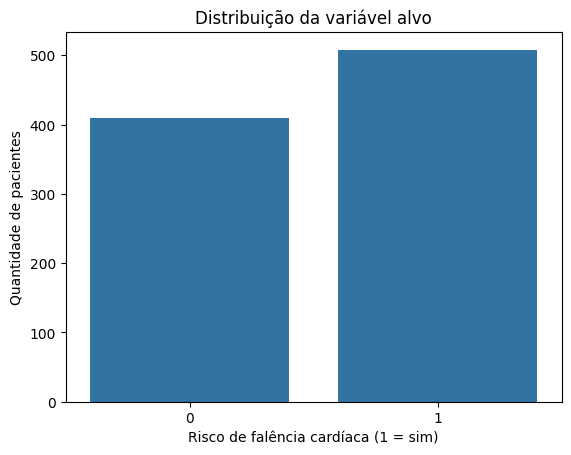

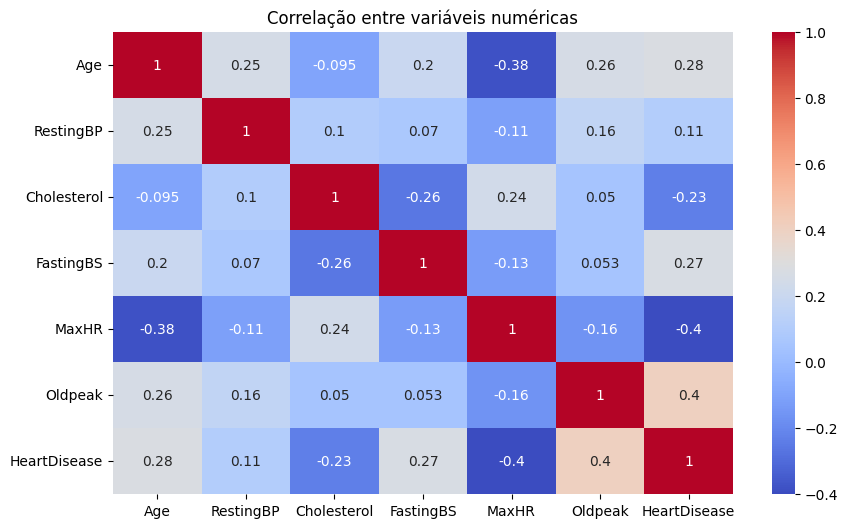

In [4]:


# Distribuição da variável alvo
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribuição da variável alvo')
plt.xlabel('Risco de falência cardíaca (1 = sim)')
plt.ylabel('Quantidade de pacientes')
plt.show()

# Correlação entre as variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis numéricas')
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler

# Verificar valores ausentes
print(df.isnull().sum())

# Transformar colunas categóricas em números (One-Hot Encoding)
X = df.drop('HeartDisease', axis=1)
X = pd.get_dummies(X, drop_first=True)

# Variável alvo
y = df['HeartDisease']

# Padronizar os dados numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


4. Divisão treino e teste

In [6]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
 

5. Modelos

In [7]:

 
#Modelo1: Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia Random Forest: {acc_rf:.2f}')
 
#Modelo2: K-Nearest Neighbors
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f'Acurácia KNN: {acc_knn:.2f}')

Acurácia Random Forest: 0.88
Acurácia KNN: 0.85


6. Avaliação dos Modelos

In [8]:

#Avaliação Random Forest
print('Relatório Random Forest:')
print(classification_report(y_test, y_pred_rf))
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred_rf))
 
#Avaliação KNN
print('Relatório KNN:')
print(classification_report(y_test, y_pred_knn))
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred_knn))
 

 

Relatório Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

Matriz de Confusão:
[[66 11]
 [12 95]]
Relatório KNN:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Matriz de Confusão:
[[67 10]
 [17 90]]


Por fim, ambos os modelos apresentaram boas acurácias, mas o modelo que obteve a **maior taxa de acerto** foi o
# Random Forest.

Nivel II

In [9]:
import numpy as np

acc_rf_list = []
acc_knn_list = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=i
    )

    # Random Forest
    model_rf = RandomForestClassifier(random_state=i)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    acc_rf_list.append(accuracy_score(y_test, y_pred_rf))

    # KNN
    model_knn = KNeighborsClassifier()
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)
    acc_knn_list.append(accuracy_score(y_test, y_pred_knn))

# Resultados
print(f"Random Forest - Média: {np.mean(acc_rf_list):.4f} | Desvio Padrão: {np.std(acc_rf_list):.4f}")
print(f"KNN           - Média: {np.mean(acc_knn_list):.4f} | Desvio Padrão: {np.std(acc_knn_list):.4f}")

# Conclusão: 
# Random Forest teve maior média de acurácia e menor desvio padrão

Random Forest - Média: 0.8685 | Desvio Padrão: 0.0231
KNN           - Média: 0.8616 | Desvio Padrão: 0.0238


In [10]:
import pickle

final_model = RandomForestClassifier()
final_model.fit(X_scaled, y)

with open("modelo_final.pkl", "wb") as f:
    pickle.dump(final_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [11]:
import gradio as gr
import numpy as np
import pandas as pd
import pickle

with open("modelo_final.pkl", "rb") as f:
    modelo = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Lista de colunas originais antes de usar get_dummies 
colunas_originais = [
    "Age", "Sex", "ChestPainType", "Cholesterol", "FastingBS", "RestingECG",
    "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"
]

# Função que transforma entrada em DataFrame e faz a predição
def prever(age, sex, cp, chol, fbs, ecg, maxhr, angina, oldpeak, slope):
    entrada_dict = {
        "Age": age,
        "Sex": sex,
        "ChestPainType": cp,
        "Cholesterol": chol,
        "FastingBS": fbs,
        "RestingECG": ecg,
        "MaxHR": maxhr,
        "ExerciseAngina": angina,
        "Oldpeak": oldpeak,
        "ST_Slope": slope
    }

    df_input = pd.DataFrame([entrada_dict])

    # Transformar categóricas em dummies 
    df_input = pd.get_dummies(df_input)

    # Adicionar colunas faltantes com 0
    for col in modelo.feature_names_in_:
        if col not in df_input.columns:
            df_input[col] = 0

    # Ordenar as colunas na mesma ordem usada no treino
    df_input = df_input[modelo.feature_names_in_]

    # Escalar e prever
    entrada_normalizada = scaler.transform(df_input)
    pred = modelo.predict(entrada_normalizada)[0]
    return "🔴 RISCO de falência cardíaca" if pred == 1 else "🟢 SEM risco"

# Criar interface com campos mistos
gr.Interface(
    fn=prever,
    inputs=[
        gr.Number(label="Idade"),
        gr.Dropdown(["M", "F"], label="Sexo"),
        gr.Dropdown(["ATA", "NAP", "ASY", "TA"], label="Tipo de dor no peito"),
        gr.Number(label="Colesterol"),
        gr.Dropdown([0, 1], label="FastingBS (0 = não, 1 = sim)"),
        gr.Dropdown(["Normal", "ST", "LVH"], label="ECG em repouso"),
        gr.Number(label="Frequência cardíaca máxima (MaxHR)"),
        gr.Dropdown(["Yes", "No"], label="Angina por esforço"),
        gr.Number(label="Oldpeak"),
        gr.Dropdown(["Up", "Flat", "Down"], label="Inclinação do segmento ST")
    ],
    outputs="text",
    title="Classificador de Falência Cardíaca",
    description="Preencha os dados do paciente para prever risco de falência cardíaca."
).launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
